In [1]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
import datetime as dt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics 
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
pd.set_option('display.max_columns', 67)
pd.set_option('display.max_rows', 20)
pd.set_option('display.max_colwidth', -1)


C:\Users\PC\AppData\Local\Temp\ipykernel_24292\2360568814.py:14: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


In [2]:
#PHASE 1 
#USE OWID-COVID-DATASET THATS NOT ENGINEERED
#predict the total cases using a number of features
import pandas as pd
covid_csv = pd.read_csv("owid-covid-data.csv")

In [3]:
covid_csv.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,0.126,0.126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


In [4]:
#select features
columns = ['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',  'total_deaths', 'new_deaths' ]
covid = covid_csv[columns]
covid

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...
198841,ZWE,Africa,Zimbabwe,2022-06-30,255586.0,66.0,5555.0,2.0
198842,ZWE,Africa,Zimbabwe,2022-07-01,255586.0,0.0,5555.0,0.0
198843,ZWE,Africa,Zimbabwe,2022-07-02,255586.0,0.0,5555.0,0.0
198844,ZWE,Africa,Zimbabwe,2022-07-03,255586.0,0.0,5555.0,0.0


In [5]:
#removing NAs 
print(covid.shape)
print('\n Check for null values:')
print(covid.isnull().sum())
print('\n\n Data types:\n',covid.dtypes)

(198846, 8)

 Check for null values:
iso_code        0    
continent       11529
location        0    
date            0    
total_cases     7932 
new_cases       8206 
total_deaths    26564
new_deaths      26599
dtype: int64


 Data types:
 iso_code        object 
continent       object 
location        object 
date            object 
total_cases     float64
new_cases       float64
total_deaths    float64
new_deaths      float64
dtype: object


In [6]:
#NaN values will be dropped from the dataset
covid = covid.dropna() 
covid

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths
28,AFG,Asia,Afghanistan,2020-03-23,40.0,6.0,1.0,1.0
29,AFG,Asia,Afghanistan,2020-03-24,42.0,2.0,1.0,0.0
30,AFG,Asia,Afghanistan,2020-03-25,74.0,32.0,1.0,0.0
31,AFG,Asia,Afghanistan,2020-03-26,80.0,6.0,2.0,1.0
32,AFG,Asia,Afghanistan,2020-03-27,91.0,11.0,2.0,0.0
...,...,...,...,...,...,...,...,...
198841,ZWE,Africa,Zimbabwe,2022-06-30,255586.0,66.0,5555.0,2.0
198842,ZWE,Africa,Zimbabwe,2022-07-01,255586.0,0.0,5555.0,0.0
198843,ZWE,Africa,Zimbabwe,2022-07-02,255586.0,0.0,5555.0,0.0
198844,ZWE,Africa,Zimbabwe,2022-07-03,255586.0,0.0,5555.0,0.0


In [7]:
covid['date'] = pd.to_datetime(covid['date']) #already in date time

C:\Users\PC\AppData\Local\Temp\ipykernel_24292\1141032236.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid['date'] = pd.to_datetime(covid['date']) #already in date time


In [8]:
covid.head()

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths
28,AFG,Asia,Afghanistan,2020-03-23,40.0,6.0,1.0,1.0
29,AFG,Asia,Afghanistan,2020-03-24,42.0,2.0,1.0,0.0
30,AFG,Asia,Afghanistan,2020-03-25,74.0,32.0,1.0,0.0
31,AFG,Asia,Afghanistan,2020-03-26,80.0,6.0,2.0,1.0
32,AFG,Asia,Afghanistan,2020-03-27,91.0,11.0,2.0,0.0


In [9]:
latest_date = covid['date'].max()
latest_date


Timestamp('2022-07-04 00:00:00')

In [10]:
start_date = covid['date'].min()
start_date

Timestamp('2020-01-23 00:00:00')

In [11]:
filter_df = covid.loc[(covid['date'] > start_date) & (covid['date'] <latest_date)]
filter_df


,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths
28,AFG,Asia,Afghanistan,2020-03-23,40.0,6.0,1.0,1.0
29,AFG,Asia,Afghanistan,2020-03-24,42.0,2.0,1.0,0.0
30,AFG,Asia,Afghanistan,2020-03-25,74.0,32.0,1.0,0.0
31,AFG,Asia,Afghanistan,2020-03-26,80.0,6.0,2.0,1.0
32,AFG,Asia,Afghanistan,2020-03-27,91.0,11.0,2.0,0.0
...,...,...,...,...,...,...,...,...
198840,ZWE,Africa,Zimbabwe,2022-06-29,255520.0,137.0,5553.0,4.0
198841,ZWE,Africa,Zimbabwe,2022-06-30,255586.0,66.0,5555.0,2.0
198842,ZWE,Africa,Zimbabwe,2022-07-01,255586.0,0.0,5555.0,0.0
198843,ZWE,Africa,Zimbabwe,2022-07-02,255586.0,0.0,5555.0,0.0


In [12]:
latest_cases_df = covid[covid['date'] == latest_date]

In [13]:
#total cases as of latest date in the dataset
uae_latest = latest_cases_df[latest_cases_df['location'] == 'United Arab Emirates']
uae_latest
print('Total number of cases so far in the UAE is: ',uae_latest['total_cases'].iloc[-1])

Total number of cases so far in the UAE is:  952960.0


In [14]:
#summing deaths and total cases and total deaths of the world
sum_of_total_cases = latest_cases_df.agg({'total_cases':'sum','total_deaths':'sum'})
print('Total number of cases so far in the world is: ',sum_of_total_cases['total_cases'])
print('Total number of deaths so far in the world is: ',sum_of_total_cases['total_deaths'])

Total number of cases so far in the world is:  462836207.0
Total number of deaths so far in the world is:  5385242.0


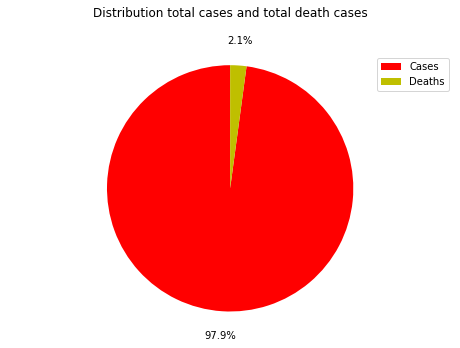

In [15]:
labels = ['Cases','Deaths',]
sizes = [latest_cases_df['total_cases'].iloc[-1],latest_cases_df['total_deaths'].iloc[-1]]
colors = ['r','y']
explode = [0,0]
plt.figure(figsize=(8,5))
plt.pie(sizes,autopct='%1.1f%%',pctdistance=1.2,explode=explode,colors = colors,startangle=90)
plt.axis('equal')
plt.title('Distribution total cases and total death cases\n\n')
plt.legend(labels=labels,loc='upper right')
plt.show()

In [16]:
print('Mortality rate is 2.1%')

Mortality rate is 2.1%


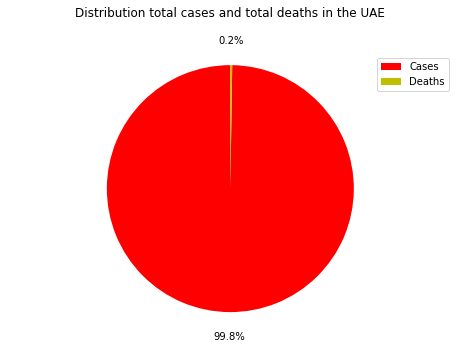

In [17]:
labels = ['Cases','Deaths',]
sizes = [uae_latest['total_cases'].iloc[-1],uae_latest['total_deaths'].iloc[-1]]
colors = ['r','y']
explode = [0,0]
plt.figure(figsize=(8,5))
plt.pie(sizes,autopct='%1.1f%%',pctdistance=1.2,explode=explode,colors = colors,startangle=90)
plt.axis('equal')
plt.title('Distribution total cases and total deaths in the UAE\n\n')
plt.legend(labels=labels,loc='upper right')
plt.show()

In [18]:
# Count the number of locations in the focused_general_df
print(f"There are {filter_df.location.nunique()} locations in the dataframe.")

There are 211 locations in the dataframe.


In [19]:
covid_uae=covid_csv[covid_csv["location"]=="United Arab Emirates"] #limit our data only to the UAE

In [20]:
#checking null values of UAE data
display.min_rows : 60
print(covid_uae.shape)
print('\n Check for null values:')
print(covid_uae.isnull().sum())


(888, 67)

 Check for null values:
iso_code                                   0  
continent                                  0  
location                                   0  
date                                       0  
total_cases                                0  
                                          ..  
human_development_index                    0  
excess_mortality_cumulative_absolute       888
excess_mortality_cumulative                888
excess_mortality                           888
excess_mortality_cumulative_per_million    888
Length: 67, dtype: int64


In [21]:
#drop lots of colomns because of large null values // pick only select features with low NAN values
selected = ['total_cases','reproduction_rate','population_density','median_age','aged_65_older','gdp_per_capita','life_expectancy','human_development_index','hospital_beds_per_thousand','stringency_index','aged_70_older','male_smokers','female_smokers','diabetes_prevalence','hospital_beds_per_thousand','total_tests','new_tests','people_vaccinated_per_hundred','total_boosters_per_hundred','population','total_vaccinations','human_development_index']
covid_uae=covid_uae[selected]

In [22]:
#checking null values of UAE data
display.min_rows : 60
print(covid_uae.shape)
print('\n Check for null values:')
print(covid_uae.isnull().sum())


(888, 22)

 Check for null values:
total_cases                      0  
reproduction_rate                52 
population_density               0  
median_age                       0  
aged_65_older                    0  
                                ..  
people_vaccinated_per_hundred    759
total_boosters_per_hundred       740
population                       0  
total_vaccinations               513
human_development_index          0  
Length: 22, dtype: int64


In [23]:
covid_uae['new_tests'].fillna(0, inplace=True) #fill new tests with 0 when null
covid_uae=covid_uae.fillna(covid_uae.mean()) #take the mean of null values

C:\Users\PC\AppData\Local\Temp\ipykernel_24292\448653957.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_uae['new_tests'].fillna(0, inplace=True) #fill new tests with 0 when null


In [24]:
#checking null values of entire csv
display.min_rows : 60
print(covid_uae.shape)
print('\n Check for null values:')
print(covid_uae.isnull().sum())

(888, 22)

 Check for null values:
total_cases                      0
reproduction_rate                0
population_density               0
median_age                       0
aged_65_older                    0
                                ..
people_vaccinated_per_hundred    0
total_boosters_per_hundred       0
population                       0
total_vaccinations               0
human_development_index          0
Length: 22, dtype: int64


In [25]:
# Create arrays for the features and the response variable
y =covid_uae["total_cases"].values
X = covid_uae.drop(["total_cases"],axis=1).values

In [26]:
# Train and Test splitting of data 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=123)

In [27]:
# Create the regressor: reg
reg= LinearRegression()

# Fit the regressor to the training data
reg.fit(X_train,y_train)

# Predict on the test data: y_pred
y_pred=reg.predict(X_test)

#Score the model
reg.score(X_test,y_test)

0.9099028444212713

In [28]:
print("R^2: {}".format(reg.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error: {}".format(rmse))

R^2: 0.9099028444212713
Root Mean Squared Error: 103956.68763779856


In [112]:
#build a model for the world
covid_csv=covid_csv[selected]

In [113]:
#checking null values of world data
display.min_rows : 60
print(covid_csv.shape)
print('\n Check for null values:')
print(covid_csv.isnull().sum())

(198846, 22)

 Check for null values:
total_cases                      7932  
reproduction_rate                49737 
population_density               21650 
median_age                       34591 
aged_65_older                    36328 
                                 ...   
people_vaccinated_per_hundred    146578
total_boosters_per_hundred       172130
population                       1196  
total_vaccinations               143994
human_development_index          39385 
Length: 22, dtype: int64


In [114]:
covid_csv['new_tests'].fillna(0, inplace=True) #fill new tests with 0 when null
covid_csv=covid_csv.fillna(covid_csv.mean()) #take the mean of null values

C:\Users\PC\AppData\Local\Temp\ipykernel_15852\3284808133.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_csv['new_tests'].fillna(0, inplace=True) #fill new tests with 0 when null


In [115]:
#checking null values of entire csv
display.min_rows : 60
print(covid_csv.shape)
print('\n Check for null values:')
print(covid_csv.isnull().sum())

(198846, 22)

 Check for null values:
total_cases                      0
reproduction_rate                0
population_density               0
median_age                       0
aged_65_older                    0
                                ..
people_vaccinated_per_hundred    0
total_boosters_per_hundred       0
population                       0
total_vaccinations               0
human_development_index          0
Length: 22, dtype: int64


In [116]:
# Create arrays for the features and the response variable
y =covid_csv["total_cases"].values
X = covid_csv.drop(["total_cases"],axis=1).values

In [117]:
# Train and Test splitting of data 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=123)

In [118]:
# Create the regressor: reg
reg= LinearRegression()

# Fit the regressor to the training data
reg.fit(X_train,y_train)

# Predict on the test data: y_pred
y_pred=reg.predict(X_test)

#Score the model
reg.score(X_test,y_test)

0.6940224335417635

In [119]:
print("R^2: {}".format(reg.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error: {}".format(rmse))

R^2: 0.6940224335417635
Root Mean Squared Error: 11885455.345692666


In [69]:
#start of a new notebook with cleaned dataset to predict new cases we can compare it with our other model.
#phase 2
#predict new cases per 100k using engineered dataset 
df = pd.read_csv('cases_pred.csv')

In [70]:
print(df.shape)
df

(112069, 30)


,id_row,location,covid_days,total_cases,new_cases,new_cases_smoothed,new_cases_smoothed_per_million,reproduction_rate,total_vaccinations,people_fully_vaccinated,stringency_index,population,population_density,median_age,aged_65_older,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,life_expectancy,human_development_index,daily_vaccinations,daily_people_fully_vaccinated,total_cases_per_100K,new_cases_per_100K,total_vaccinations_per_100K,people_fully_vaccinated_per_100K,daily_vaccinations_per_100K,daily_people_fully_vaccinated_per_100K
0,34,Afghanistan,88,114.0,8.0,11.429,0.287,1.52,0.0,0.0,67.59,39835428.0,54.422,18.6,2.581,1803.987,597.029,9.59,NaN,NaN,64.83,0.511,0.0,0.0,0.2862,0.0201,0.0,0.0,0.000000,0.000000
1,35,Afghanistan,89,114.0,0.0,10.571,0.265,1.52,0.0,0.0,67.59,39835428.0,54.422,18.6,2.581,1803.987,597.029,9.59,NaN,NaN,64.83,0.511,0.0,0.0,0.2862,0.0000,0.0,0.0,0.000000,0.000000
2,36,Afghanistan,90,166.0,52.0,17.714,0.445,1.53,0.0,0.0,67.59,39835428.0,54.422,18.6,2.581,1803.987,597.029,9.59,NaN,NaN,64.83,0.511,0.0,0.0,0.4167,0.1305,0.0,0.0,0.000000,0.000000
3,37,Afghanistan,91,192.0,26.0,16.857,0.423,1.52,0.0,0.0,67.59,39835428.0,54.422,18.6,2.581,1803.987,597.029,9.59,NaN,NaN,64.83,0.511,0.0,0.0,0.4820,0.0653,0.0,0.0,0.000000,0.000000
4,38,Afghanistan,92,235.0,43.0,22.143,0.556,1.52,0.0,0.0,67.59,39835428.0,54.422,18.6,2.581,1803.987,597.029,9.59,NaN,NaN,64.83,0.511,0.0,0.0,0.5899,0.1079,0.0,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112064,198743,Zimbabwe,813,245194.0,236.0,220.571,14.615,0.71,8552429.0,3461926.0,61.11,15092171.0,42.729,19.6,2.822,1899.775,307.846,1.82,1.6,30.7,61.49,0.571,137952.0,6000.0,1624.6437,1.5637,56670.0,22940.0,914.063325,39.755712
112065,198744,Zimbabwe,814,245645.0,451.0,233.286,15.457,0.71,8691642.0,3473523.0,61.11,15092171.0,42.729,19.6,2.822,1899.775,307.846,1.82,1.6,30.7,61.49,0.571,139213.0,11597.0,1627.6320,2.9883,57590.0,23020.0,922.418650,76.841165
112066,198745,Zimbabwe,815,245645.0,0.0,170.429,11.293,0.69,8791728.0,3487962.0,61.11,15092171.0,42.729,19.6,2.822,1899.775,307.846,1.82,1.6,30.7,61.49,0.571,100086.0,14439.0,1627.6320,0.0000,58250.0,23110.0,663.165028,95.672120
112067,198746,Zimbabwe,816,245820.0,175.0,195.429,12.949,0.68,8845039.0,3493763.0,61.11,15092171.0,42.729,19.6,2.822,1899.775,307.846,1.82,1.6,30.7,61.49,0.571,53311.0,5801.0,1628.7915,1.1595,58610.0,23150.0,353.236125,38.437147


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112069 entries, 0 to 112068
Data columns (total 30 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   id_row                                  112069 non-null  int64  
 1   location                                112069 non-null  object 
 2   covid_days                              112069 non-null  int64  
 3   total_cases                             112069 non-null  float64
 4   new_cases                               112069 non-null  float64
 5   new_cases_smoothed                      111964 non-null  float64
 6   new_cases_smoothed_per_million          111964 non-null  float64
 7   reproduction_rate                       112069 non-null  float64
 8   total_vaccinations                      112069 non-null  float64
 9   people_fully_vaccinated                 112069 non-null  float64
 10  stringency_index                        1120

In [72]:
# remove index while also changing index to id_row
df = df.set_index('id_row').sort_values(by='id_row')
print(df.shape)
df.head()

(112069, 29)


,location,covid_days,total_cases,new_cases,new_cases_smoothed,new_cases_smoothed_per_million,reproduction_rate,total_vaccinations,people_fully_vaccinated,stringency_index,population,population_density,median_age,aged_65_older,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,life_expectancy,human_development_index,daily_vaccinations,daily_people_fully_vaccinated,total_cases_per_100K,new_cases_per_100K,total_vaccinations_per_100K,people_fully_vaccinated_per_100K,daily_vaccinations_per_100K,daily_people_fully_vaccinated_per_100K
id_row,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
34,Afghanistan,88,114.0,8.0,11.429,0.287,1.52,0.0,0.0,67.59,39835428.0,54.422,18.6,2.581,1803.987,597.029,9.59,NaN,NaN,64.83,0.511,0.0,0.0,0.2862,0.0201,0.0,0.0,0.0,0.0
35,Afghanistan,89,114.0,0.0,10.571,0.265,1.52,0.0,0.0,67.59,39835428.0,54.422,18.6,2.581,1803.987,597.029,9.59,NaN,NaN,64.83,0.511,0.0,0.0,0.2862,0.0000,0.0,0.0,0.0,0.0
36,Afghanistan,90,166.0,52.0,17.714,0.445,1.53,0.0,0.0,67.59,39835428.0,54.422,18.6,2.581,1803.987,597.029,9.59,NaN,NaN,64.83,0.511,0.0,0.0,0.4167,0.1305,0.0,0.0,0.0,0.0
37,Afghanistan,91,192.0,26.0,16.857,0.423,1.52,0.0,0.0,67.59,39835428.0,54.422,18.6,2.581,1803.987,597.029,9.59,NaN,NaN,64.83,0.511,0.0,0.0,0.4820,0.0653,0.0,0.0,0.0,0.0
38,Afghanistan,92,235.0,43.0,22.143,0.556,1.52,0.0,0.0,67.59,39835428.0,54.422,18.6,2.581,1803.987,597.029,9.59,NaN,NaN,64.83,0.511,0.0,0.0,0.5899,0.1079,0.0,0.0,0.0,0.0


In [73]:
df.info

<bound method DataFrame.info of            location  covid_days  total_cases  new_cases  new_cases_smoothed  \
id_row                                                                        
34      Afghanistan  88          114.0        8.0        11.429               
35      Afghanistan  89          114.0        0.0        10.571               
36      Afghanistan  90          166.0        52.0       17.714               
37      Afghanistan  91          192.0        26.0       16.857               
38      Afghanistan  92          235.0        43.0       22.143               
...             ...  ..            ...         ...          ...               
198743  Zimbabwe     813         245194.0     236.0      220.571              
198744  Zimbabwe     814         245645.0     451.0      233.286              
198745  Zimbabwe     815         245645.0     0.0        170.429              
198746  Zimbabwe     816         245820.0     175.0      195.429              
198747  Zimbabwe    

In [74]:
#drop columns that are smoothed
#27 features left
cols_drop = ['new_cases_smoothed', 'new_cases_smoothed_per_million']
new_df = df.drop(columns=cols_drop, axis=1)
print(new_df.shape) 
new_df.info()

(112069, 27)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 112069 entries, 34 to 198747
Data columns (total 27 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   location                                112069 non-null  object 
 1   covid_days                              112069 non-null  int64  
 2   total_cases                             112069 non-null  float64
 3   new_cases                               112069 non-null  float64
 4   reproduction_rate                       112069 non-null  float64
 5   total_vaccinations                      112069 non-null  float64
 6   people_fully_vaccinated                 112069 non-null  float64
 7   stringency_index                        112069 non-null  float64
 8   population                              112069 non-null  float64
 9   population_density                      112069 non-null  float64
 10  median_age                    

In [75]:
new_df.isnull().sum()

location                                  0 
covid_days                                0 
total_cases                               0 
new_cases                                 0 
reproduction_rate                         0 
                                         .. 
new_cases_per_100K                        78
total_vaccinations_per_100K               0 
people_fully_vaccinated_per_100K          0 
daily_vaccinations_per_100K               0 
daily_people_fully_vaccinated_per_100K    0 
Length: 27, dtype: int64

In [76]:
#fill new_cases_per_100k nan values with mean values
new_df['new_cases_per_100K'].fillna((new_df['new_cases_per_100K'].mean()), inplace=True)


In [77]:
new_df.isnull().sum()

location                                  0
covid_days                                0
total_cases                               0
new_cases                                 0
reproduction_rate                         0
                                         ..
new_cases_per_100K                        0
total_vaccinations_per_100K               0
people_fully_vaccinated_per_100K          0
daily_vaccinations_per_100K               0
daily_people_fully_vaccinated_per_100K    0
Length: 27, dtype: int64

In [78]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112069 entries, 34 to 198747
Data columns (total 27 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   location                                112069 non-null  object 
 1   covid_days                              112069 non-null  int64  
 2   total_cases                             112069 non-null  float64
 3   new_cases                               112069 non-null  float64
 4   reproduction_rate                       112069 non-null  float64
 5   total_vaccinations                      112069 non-null  float64
 6   people_fully_vaccinated                 112069 non-null  float64
 7   stringency_index                        112069 non-null  float64
 8   population                              112069 non-null  float64
 9   population_density                      112069 non-null  float64
 10  median_age                              112

In [79]:
#now we drop female & male smokers because the NAN value is higher than 60%
#reference article sent by prof
cols_drop = ['female_smokers', 'male_smokers']
new_df = new_df.drop(columns=cols_drop, axis=1)

In [80]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112069 entries, 34 to 198747
Data columns (total 25 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   location                                112069 non-null  object 
 1   covid_days                              112069 non-null  int64  
 2   total_cases                             112069 non-null  float64
 3   new_cases                               112069 non-null  float64
 4   reproduction_rate                       112069 non-null  float64
 5   total_vaccinations                      112069 non-null  float64
 6   people_fully_vaccinated                 112069 non-null  float64
 7   stringency_index                        112069 non-null  float64
 8   population                              112069 non-null  float64
 9   population_density                      112069 non-null  float64
 10  median_age                              112

In [81]:
# Count the number of locations in the focused_general_df
print(f"There are {new_df.location.nunique()} locations in the cleaned dataframe.")

There are 177 locations in the cleaned dataframe.


In [82]:
#only select countries with a population of over 1million as smaller contries exist within the data
#low pop countries have bad reporting
new_df = new_df[(new_df["population"] >= 1000000)]
new_df.shape

(99856, 25)

In [83]:
#number of locations in the new dataframe
countries = new_df["location"].unique()
countries

array(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina',
       'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahrain',
       'Bangladesh', 'Belarus', 'Belgium', 'Benin', 'Bolivia',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Bulgaria',
       'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Congo', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Czechia',
       'Democratic Republic of Congo', 'Denmark', 'Djibouti',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia',
       'Finland', 'France', 'Gabon', 'Gambia', 'Georgia', 'Germany',
       'Ghana', 'Greece', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Haiti',
       'Honduras', 'Hungary', 'India', 'Indonesia', 'Iran', 'Iraq',
       'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan', 'Jordan',
       'Kazakhstan', 'Kenya', 'Kuwait', 'Kyrgyz

In [84]:
# Create a new DataFrame with the engineered columns for the model. 
# we will take values within 100k
#16 features with target new cases 100k
drop = ['location', 'total_cases', 'new_cases', 'total_vaccinations', 
                   'people_fully_vaccinated', 'daily_vaccinations', 'daily_people_fully_vaccinated', 'population']
new_df1 = new_df.drop(columns=drop, axis=1)
new_df1

,covid_days,reproduction_rate,stringency_index,population_density,median_age,aged_65_older,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,life_expectancy,human_development_index,total_cases_per_100K,new_cases_per_100K,total_vaccinations_per_100K,people_fully_vaccinated_per_100K,daily_vaccinations_per_100K,daily_people_fully_vaccinated_per_100K
id_row,,,,,,,,,,,,,,,,,
34,88,1.52,67.59,54.422,18.6,2.581,1803.987,597.029,9.59,64.83,0.511,0.2862,0.0201,0.0,0.0,0.000000,0.000000
35,89,1.52,67.59,54.422,18.6,2.581,1803.987,597.029,9.59,64.83,0.511,0.2862,0.0000,0.0,0.0,0.000000,0.000000
36,90,1.53,67.59,54.422,18.6,2.581,1803.987,597.029,9.59,64.83,0.511,0.4167,0.1305,0.0,0.0,0.000000,0.000000
37,91,1.52,67.59,54.422,18.6,2.581,1803.987,597.029,9.59,64.83,0.511,0.4820,0.0653,0.0,0.0,0.000000,0.000000
38,92,1.52,67.59,54.422,18.6,2.581,1803.987,597.029,9.59,64.83,0.511,0.5899,0.1079,0.0,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198743,813,0.71,61.11,42.729,19.6,2.822,1899.775,307.846,1.82,61.49,0.571,1624.6437,1.5637,56670.0,22940.0,914.063325,39.755712
198744,814,0.71,61.11,42.729,19.6,2.822,1899.775,307.846,1.82,61.49,0.571,1627.6320,2.9883,57590.0,23020.0,922.418650,76.841165
198745,815,0.69,61.11,42.729,19.6,2.822,1899.775,307.846,1.82,61.49,0.571,1627.6320,0.0000,58250.0,23110.0,663.165028,95.672120


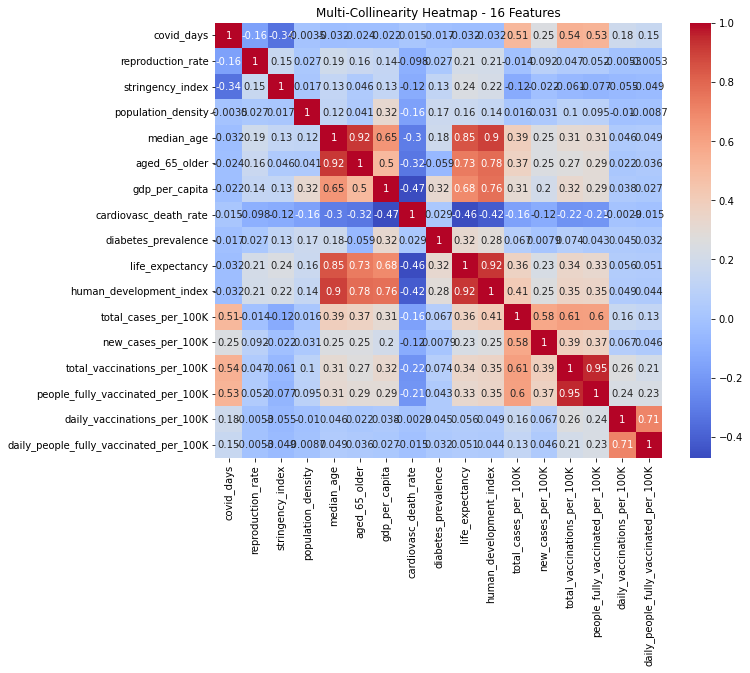

In [85]:
# collinearity heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(new_df1.corr(), annot=True, cmap='coolwarm')
plt.title('Multi-Collinearity Heatmap - 16 Features')
plt.show()

In [86]:
y = new_df1.new_cases_per_100K #target
X = new_df1.drop(["new_cases_per_100K"], axis=1) #features


In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [92]:
# Create the regressor
reg= LinearRegression()

# Fit the regressor
reg.fit(X_train,y_train)

# Prediction on test
y_pred=reg.predict(X_test)
y_pred

array([ -3.74328685,  19.52472322, -10.41419329, ...,  -1.8397376 ,
        -1.29768774,  13.62841595])

In [90]:
#Score of the regressor
reg.score(X_test,y_test)

0.34535126082596923

In [51]:
print("R^2: {}".format(reg.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error: {}".format(rmse))

R^2: 0.34535126082596923
Root Mean Squared Error: 41.56905716608328


In [52]:
# Create a RF regressor
rf_model = RandomForestRegressor(random_state=0)

# fitting the model
rf_model = rf_model.fit(X, y)

In [53]:
# predict RFmodel on test data
y_pred = rf_model.predict(X_test)
y_pred

array([ 0.290251, 19.425899,  0.423156, ...,  4.125787,  0.019885,
        0.320871])

In [54]:
r2 = r2_score(y_test, y_pred)
RMSE = metrics.mean_squared_error(y_test, y_pred, squared=False)

print(f"R^2 : {r2: .3f}")
print(f"Root Mean Squared Error: {RMSE: .3f}")

R^2 :  0.969
Root Mean Squared Error:  9.024


In [55]:
# training score for rf_model
training_score = rf_model.score(X_train, y_train)
print(f"The training score for the Random Forest Regression model on 16 features is {training_score: .2f}.")

The training score for the Random Forest Regression model on 16 features is  0.97.


In [56]:
 #test score for rf_model
testing_score = rf_model.score(X_test, y_test)
print(f"The testing score for the Random Forest Regression model on 16 features is {testing_score: .2f}.")

The testing score for the Random Forest Regression model on 16 features is  0.97.


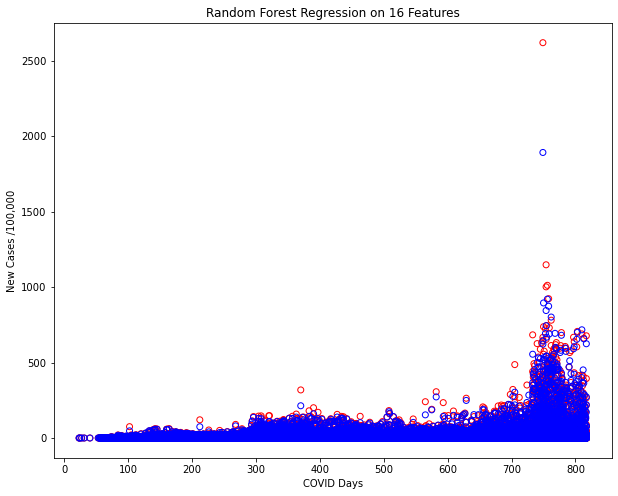

In [57]:
# Visualize the predication against the actual values
plt.figure(figsize=(10, 8))
plt.scatter(X_test['covid_days'].values, y_test, facecolors='none', edgecolors='r')
plt.scatter(X_test['covid_days'].values, y_pred, facecolors='none', edgecolors='blue')

plt.title('Random Forest Regression on 16 Features')
plt.xlabel('COVID Days')
plt.ylabel('New Cases /100,000')
plt.show() 

In [97]:
#create df for uae using engineered dataset
drop = ['total_cases', 'new_cases', 'total_vaccinations', 
                   'people_fully_vaccinated', 'daily_vaccinations', 'daily_people_fully_vaccinated', 'population']
covid_uae = new_df.drop(columns=drop, axis=1)

In [98]:
#set df location to uae
covid_uae=new_df[new_df["location"]=="United Arab Emirates"] #limit our data only to the UAE
covid_uae

,location,covid_days,total_cases,new_cases,reproduction_rate,total_vaccinations,people_fully_vaccinated,stringency_index,population,population_density,median_age,aged_65_older,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,life_expectancy,human_development_index,daily_vaccinations,daily_people_fully_vaccinated,total_cases_per_100K,new_cases_per_100K,total_vaccinations_per_100K,people_fully_vaccinated_per_100K,daily_vaccinations_per_100K,daily_people_fully_vaccinated_per_100K
id_row,,,,,,,,,,,,,,,,,,,,,,,,,
185626,United Arab Emirates,78,140.0,27.0,1.49,0.0,0.0,45.37,9991083.0,112.442,34.0,1.144,67293.483,317.84,17.26,77.97,0.89,0.0,0.0,1.4012,0.2702,0.0,0.0,0.0,0.0
185627,United Arab Emirates,79,140.0,0.0,1.43,0.0,0.0,45.37,9991083.0,112.442,34.0,1.144,67293.483,317.84,17.26,77.97,0.89,0.0,0.0,1.4012,0.0000,0.0,0.0,0.0,0.0
185628,United Arab Emirates,80,153.0,13.0,1.51,0.0,0.0,45.37,9991083.0,112.442,34.0,1.144,67293.483,317.84,17.26,77.97,0.89,0.0,0.0,1.5314,0.1301,0.0,0.0,0.0,0.0
185629,United Arab Emirates,81,153.0,0.0,1.65,0.0,0.0,45.37,9991083.0,112.442,34.0,1.144,67293.483,317.84,17.26,77.97,0.89,0.0,0.0,1.5314,0.0000,0.0,0.0,0.0,0.0
185630,United Arab Emirates,82,198.0,45.0,1.93,0.0,0.0,62.04,9991083.0,112.442,34.0,1.144,67293.483,317.84,17.26,77.97,0.89,0.0,0.0,1.9818,0.4504,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186361,United Arab Emirates,813,889108.0,390.0,0.93,0.0,0.0,41.67,9991083.0,112.442,34.0,1.144,67293.483,317.84,17.26,77.97,0.89,0.0,0.0,8899.0153,3.9035,0.0,0.0,0.0,0.0
186362,United Arab Emirates,814,889456.0,348.0,0.92,0.0,0.0,41.67,9991083.0,112.442,34.0,1.144,67293.483,317.84,17.26,77.97,0.89,0.0,0.0,8902.4984,3.4831,0.0,0.0,0.0,0.0
186363,United Arab Emirates,815,889797.0,341.0,0.91,0.0,0.0,41.67,9991083.0,112.442,34.0,1.144,67293.483,317.84,17.26,77.97,0.89,0.0,0.0,8905.9114,3.4130,0.0,0.0,0.0,0.0


In [99]:
drop = ['location']
covid_uae = covid_uae.drop(columns=drop, axis=1)

In [100]:
y = covid_uae.new_cases_per_100K
X = covid_uae.drop(["new_cases_per_100K"], axis=1)

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [102]:
# Create the regressor
reg= LinearRegression()

# Fit the regressor to training data
reg.fit(X_train,y_train)

# Predict on the test data
y_pred=reg.predict(X_test)

#Score
reg.score(X_test,y_test)

0.9999999999904423

In [103]:
print("R^2: {}".format(reg.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error: {}".format(rmse))

R^2: 0.9999999999904423
Root Mean Squared Error: 2.8368004372094175e-05


In [104]:
# Create a Random Forest Regression model for uae
rf_model_uae = RandomForestRegressor(random_state=0)

# Training the model
rf_model_uae = rf_model.fit(X, y)

In [105]:
# evaluate on test
y_pred = rf_model_uae.predict(X_test)
y_pred

array([ 4.722299,  0.685799, 35.34672 ,  3.9051  , 39.555583, 14.932717,
        6.002046, 15.494401, 30.197957,  0.869879,  2.114106, 22.499879,
        4.78159 ,  6.215928,  0.899598, 25.810794,  0.591711, 11.73499 ,
       21.283381,  7.797383, 16.277936,  6.260599, 11.952782,  3.816796,
        9.939887, 18.125097, 10.907203,  0.72643 , 29.568961,  4.794096,
        2.395507, 16.645212,  9.315797, 21.152482, 15.392809, 15.397017,
        5.139299,  9.785907, 27.388651,  2.09878 ,  5.704597, 12.904298,
        0.816503,  2.769097,  7.403496,  3.904599, 21.259427, 13.238213,
        9.217638,  0.601416, 11.577105,  3.214992,  5.537014, 17.324574,
       19.6282  ,  1.427269,  3.905   ,  0.046635,  3.218372, 29.947632,
        4.9132  , 12.146695, 11.583751, 21.153578, 24.92114 ,  2.393605,
       20.857018,  6.264801,  5.319711,  5.482597,  4.479302, 39.901788,
       11.313195, 33.708155, 31.645543,  9.954396,  7.8209  , 26.230156,
       13.312971, 17.649365,  0.617277,  0.731693, 

In [106]:
r2 = r2_score(y_test, y_pred)
RMSE = metrics.mean_squared_error(y_test, y_pred, squared=False)

print(f"R^2: {r2: .3f}")
print(f"Root Mean Squared Error: {RMSE: .3f}")

R^2:  1.000
Root Mean Squared Error:  0.026


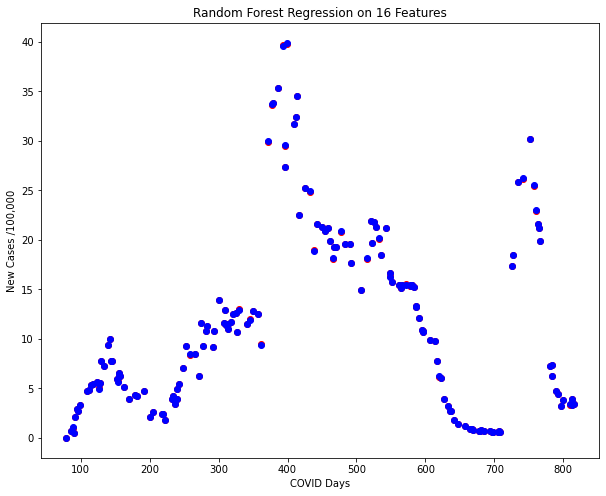

In [107]:
# Visualize the predication against the actual values
plt.figure(figsize=(10, 8))
plt.scatter(X_test['covid_days'].values, y_test, facecolors='red', edgecolors='red')
plt.scatter(X_test['covid_days'].values, y_pred, facecolors='blue', edgecolors='blue')

plt.title('Random Forest Regression on 16 Features')
plt.xlabel('COVID Days')
plt.ylabel('New Cases /100,000')
plt.show() 